Special thanks to Debjyoti Paul (My data scientist friend at Amazon) for help with this project

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
face_cascade = cv2.CascadeClassifier(r'E:\step to ML\Repositries\py-master by codebasis\DataScience\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'E:\step to ML\Repositries\py-master by codebasis\DataScience\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_eye.xml')

In [3]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [4]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

***using model***

In [5]:
from joblib import load
import numpy as np
model = load('soports_celeberty_classification.pkl')

### prepare a img for predictions

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img=cv2.imread(r'E:\Projects\image classification\images dataset\Cristiano_Ronaldo\download (5).jpg')

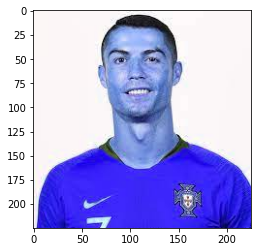

In [8]:
plt.imshow(img)

In [9]:
img.shape

(225, 225, 3)

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [11]:
cropped_img=get_cropped_image_if_2_eyes(r'E:\Projects\image classification\testing images\Shaid Afridi\.jpg')

In [12]:
cropped_img is not None

True

In [13]:
cropped_img.ndim

3

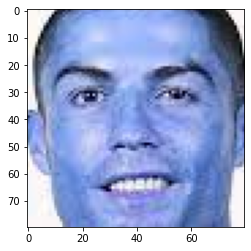

In [14]:
plt.imshow(cropped_img)

In [15]:
scalled_raw_img = cv2.resize(cropped_img, (32, 32))

In [16]:
img_har = w2d(scalled_raw_img,'db1',5)

In [17]:
scalled_img_har = cv2.resize(img_har, (32, 32))

In [18]:
combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))

In [19]:
combined_img.ndim

2

In [20]:
combined_img_1= np.array(combined_img).reshape(1,4096).astype(float)

In [21]:
combined_img_1.ndim

2

In [22]:
combined_img_1

array([[252., 249., 245., ..., 233.,  93.,  95.]])

In [23]:
# from sklearn.preprocessing import StandardScaler
# std_scaler=StandardScaler()
# trained_img=std_scaler.fit_transform(combined_img_1)

In [24]:
model.predict(combined_img_1)

array([0])